In [34]:
plt.cla()
plt.clf()
plt.close('all')

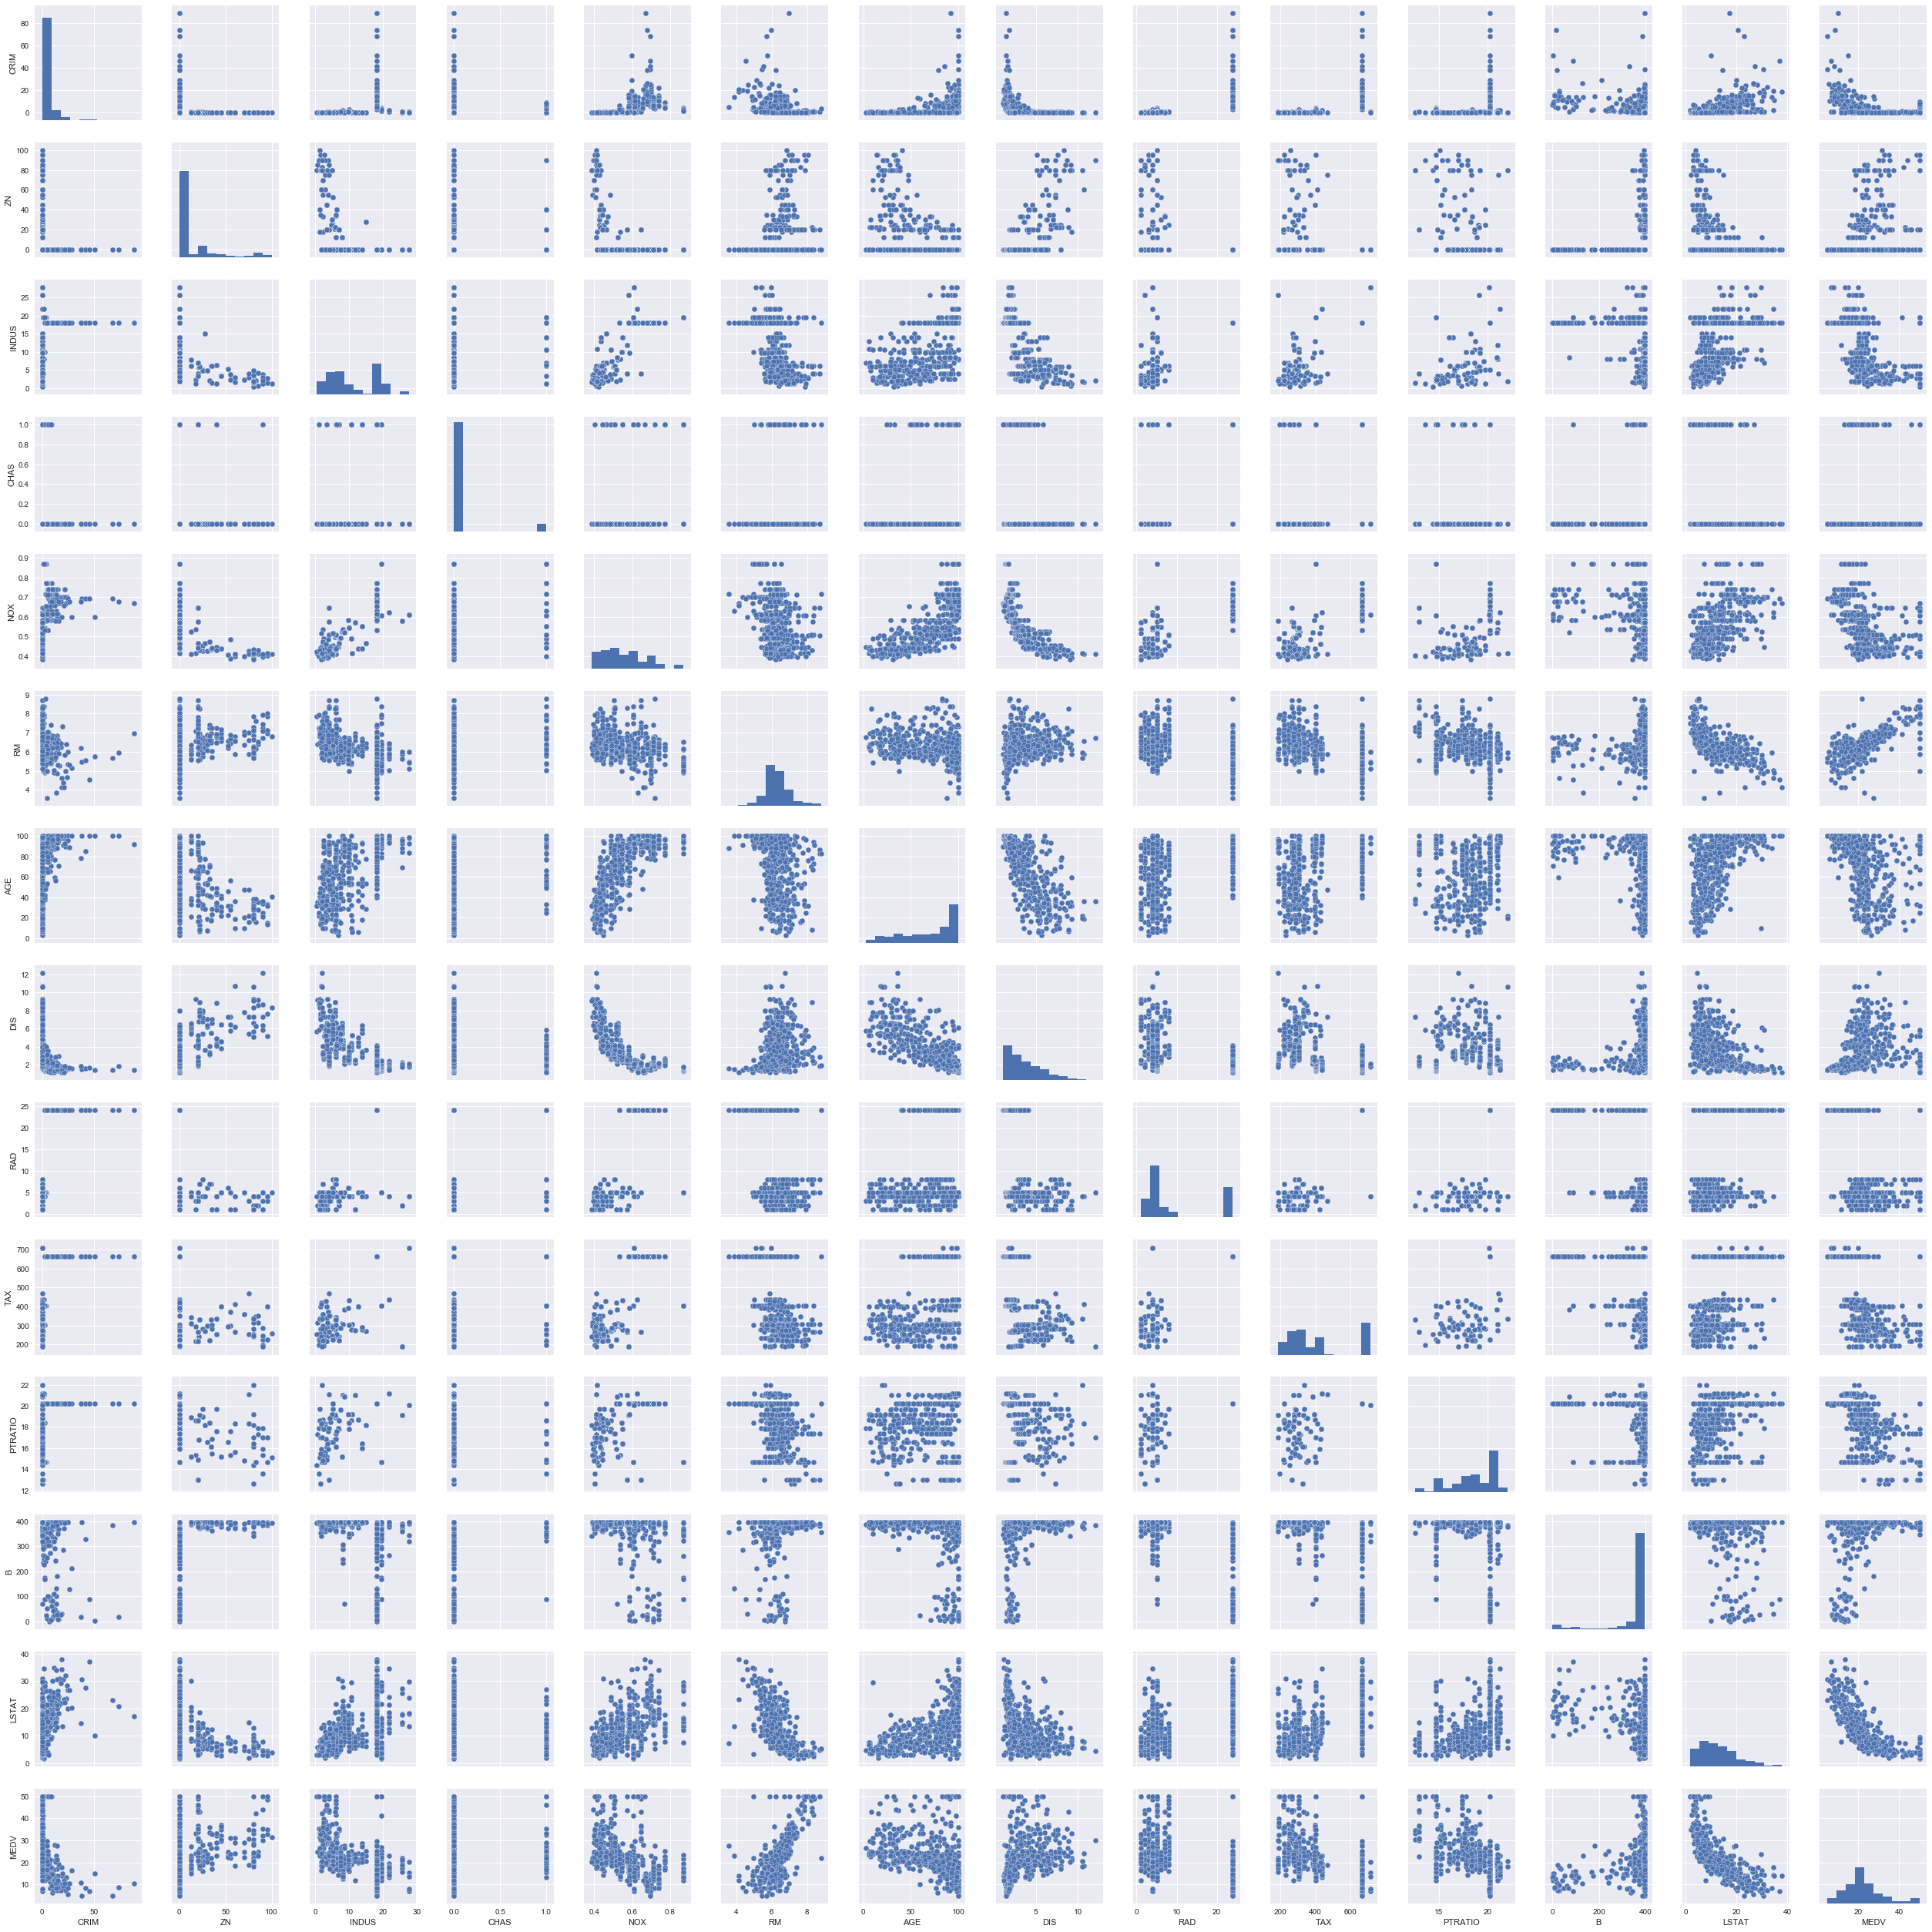

In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
'NOX', 'RM', 'AGE', 'DIS', 'RAD',
'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()
cols =  ['CRIM', 'ZN', 'INDUS', 'CHAS',
'NOX', 'RM', 'AGE', 'DIS', 'RAD',
'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df, size=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

Top3:  PTRATIO , score:  0.257847318009
Top2:  RM , score:  0.483525455991
Top1:  LSTAT , score:  0.544146297586


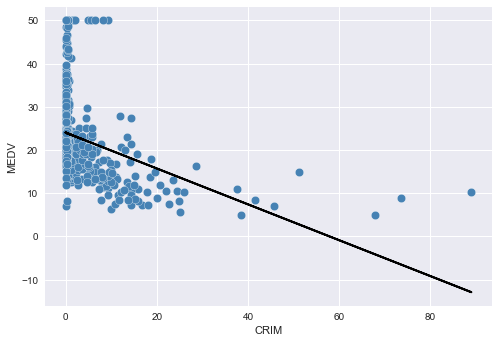

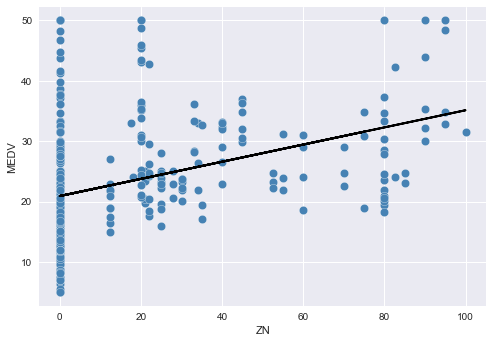

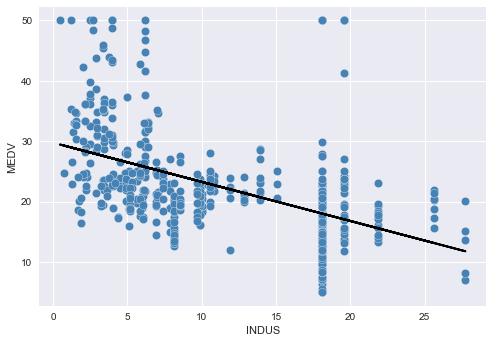

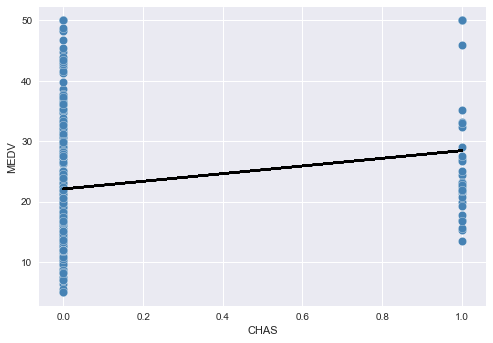

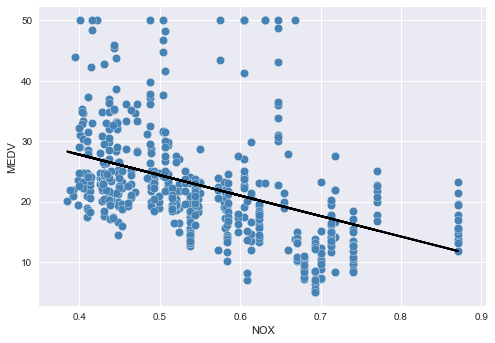

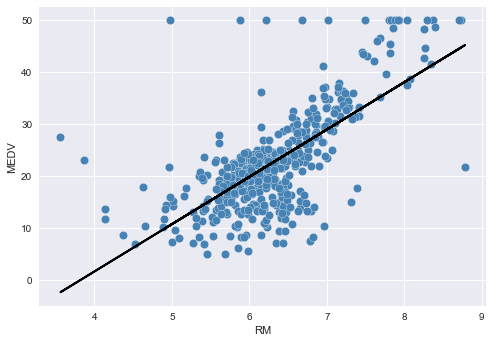

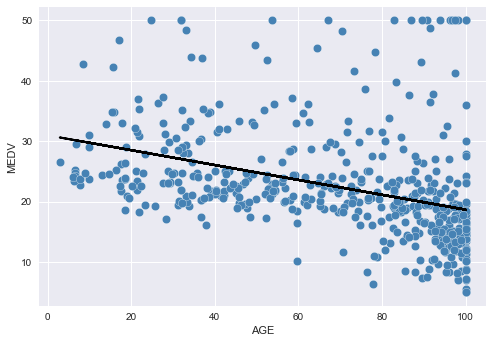

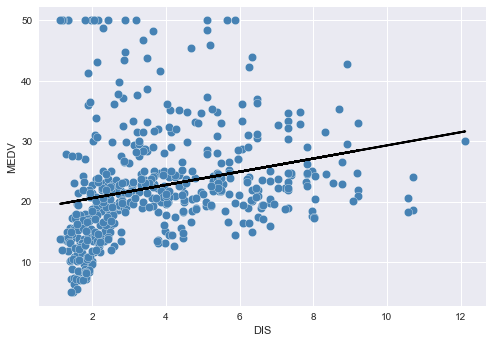

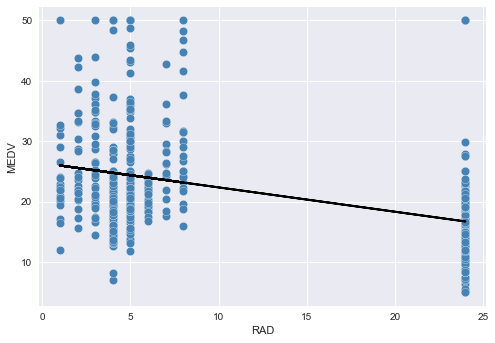

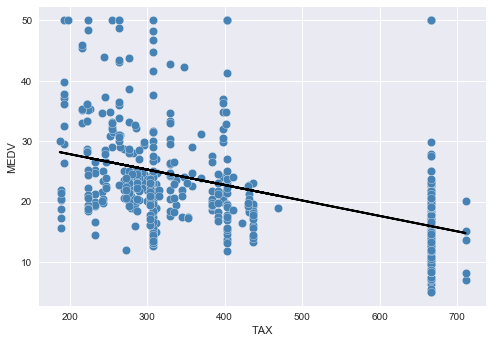

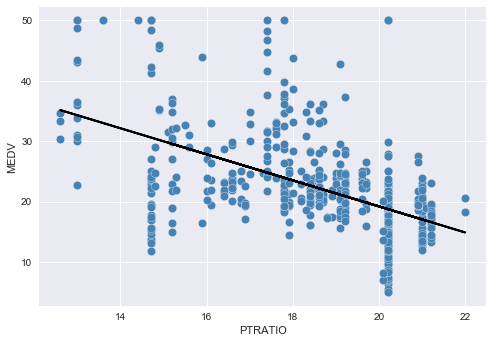

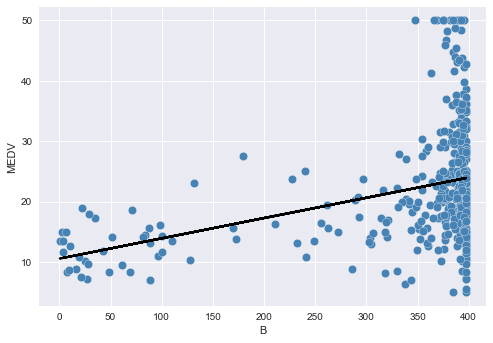

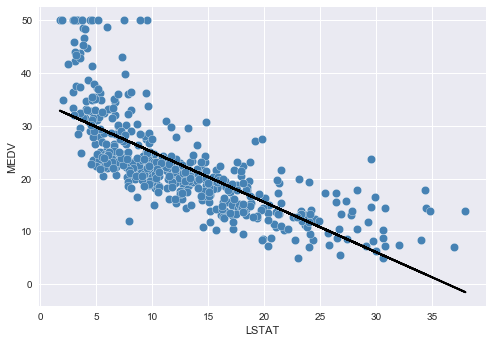

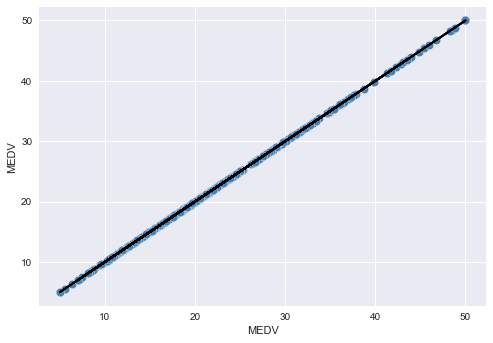

In [25]:
score = []
for i in range(len(cols)):
    plt.figure()
    slr = LinearRegression()
    x = df[cols[i]].values.reshape(-1,1)
    y = df['MEDV'].values.reshape(-1,1)
    slr.fit(x, y)
    score.append(slr.score(x,y))
    lin_regplot(x, y, slr)
    plt.xlabel(cols[i])
    plt.ylabel('MEDV')
sorted_score = sorted(score)[-4:]
top3 = int(np.where(score == sorted_score[0])[0])
top2 = int(np.where(score == sorted_score[1])[0])
top1 = int(np.where(score == sorted_score[2])[0])
print('Top3: ',cols[top3],', score: ',score[top3])
print('Top2: ',cols[top2],', score: ',score[top2])
print('Top1: ',cols[top1],', score: ',score[top1])
plt.show()

dataset에 대한 simple linear regression을 진행하였을때는 correlation 결과와 마찬가지로 PTRATIO, RM, LSTAT순으로 유사 결과가 나왔다.

In [26]:
x1 = df[cols[top3]].values.reshape(-1,1)
x2 = df[cols[top2]].values.reshape(-1,1)
x3 = df[cols[top1]].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)
x = np.hstack((np.ones(np.shape(x1)),x1,x2,x3))
w = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
print(cols[-1], ' = ',w[0],'+',w[1],'*',cols[top3],' + ',w[2],'*',cols[top2],' + ',w[3],'*',cols[top1])

MEDV  =  [ 18.56711151] + [-0.93072256] * PTRATIO  +  [ 4.51542094] * RM  +  [-0.57180569] * LSTAT


위에서 추출한 세개의 유사 특징들을 가지고 pseudo-inverse matrix를 이용하여 multiple linear regression을 진행하면 다음과 같은 식이 도출된다.

Top3:  INDUS , score:  0.268723139998
Top2:  RM , score:  0.548425637397
Top1:  LSTAT , score:  0.640716897164


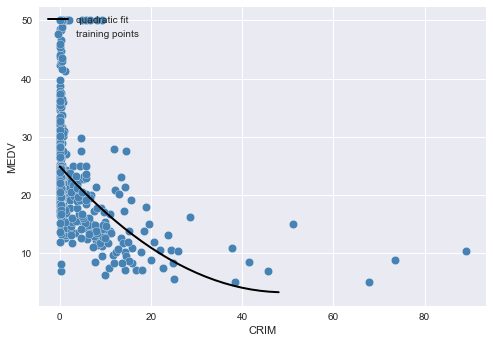

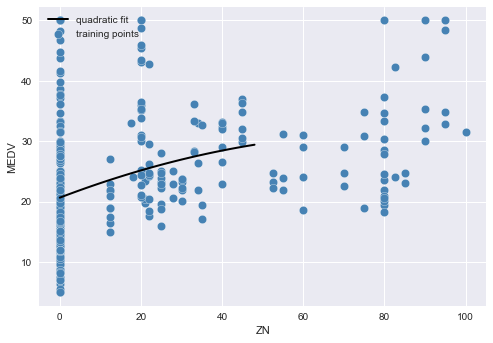

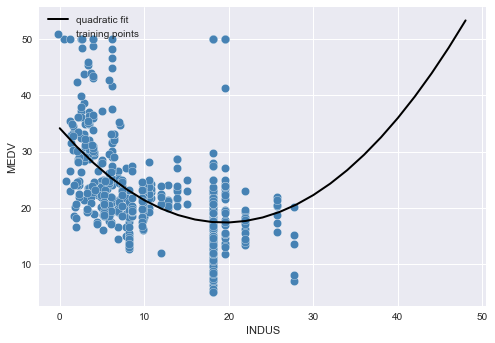

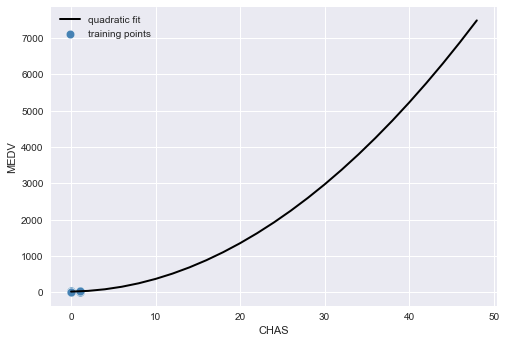

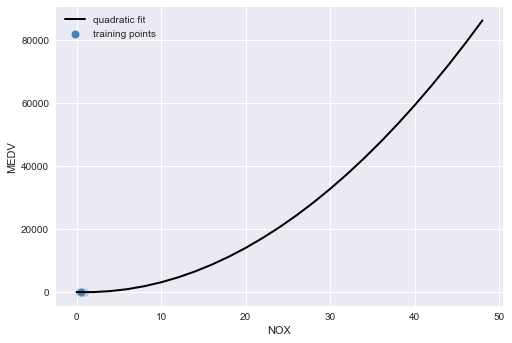

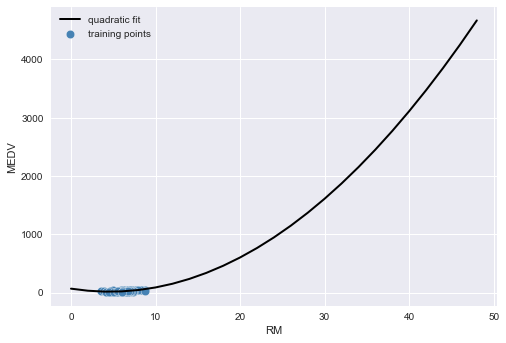

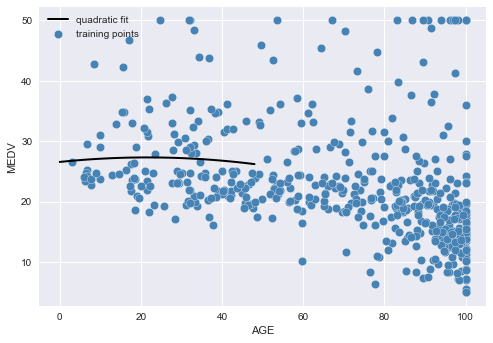

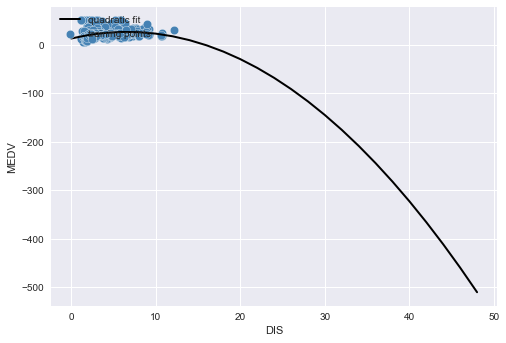

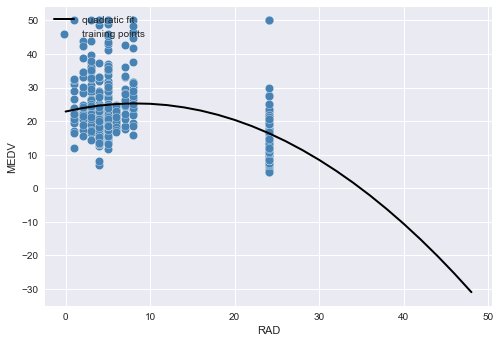

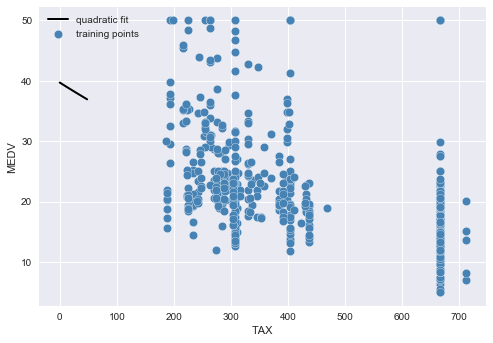

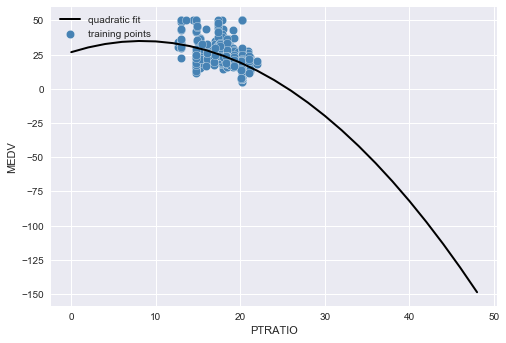

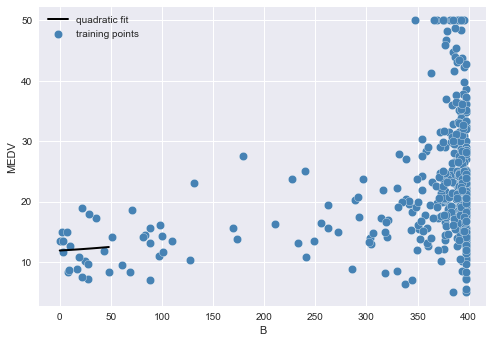

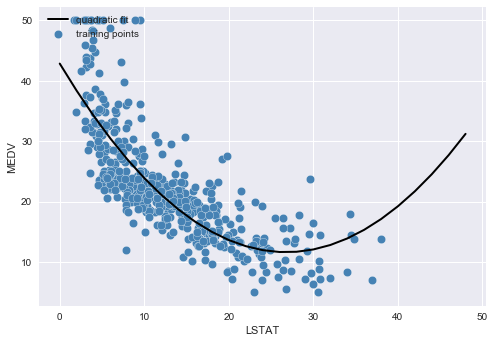

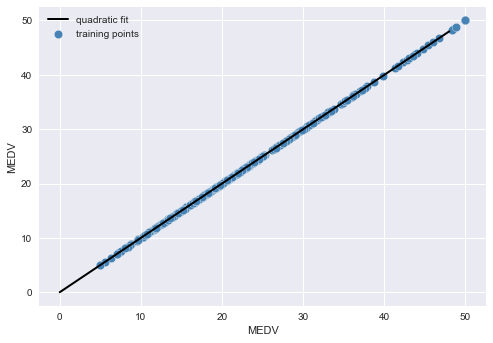

In [28]:
score = []
for i in range(len(cols)):
    plt.figure()
    x = df[cols[i]].values.reshape(-1,1)
    y = df['MEDV'].values.reshape(-1,1)
    lr = LinearRegression()
    pr = LinearRegression()
    quadratic = PolynomialFeatures(degree=2)
    X_quad = quadratic.fit_transform(x)
    lr.fit(x, y)
    X_fit = np.arange(0, 50, 2)[:, np.newaxis]
    y_lin_fit = lr.predict(X_fit)
    pr.fit(X_quad, y)
    y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))
    score.append(pr.score(quadratic.fit_transform(x),y))
    plt.scatter(x, y, label='training points',c='steelblue', edgecolor='white', s=70)
    plt.plot(X_fit, y_quad_fit, label='quadratic fit',color='black', lw=2)
    plt.legend(loc='upper left')
    plt.xlabel(cols[i])
    plt.ylabel('MEDV')
sorted_score = sorted(score)[-4:]
top3 = int(np.where(score == sorted_score[0])[0])
top2 = int(np.where(score == sorted_score[1])[0])
top1 = int(np.where(score == sorted_score[2])[0])
print('Top3: ',cols[top3],', score: ',score[top3])
print('Top2: ',cols[top2],', score: ',score[top2])
print('Top1: ',cols[top1],', score: ',score[top1])
plt.show()

dataset에 대한 quadratic polynomial regression을 진행하였을때는 correlation 결과와 조금 다르게 TAX, RM, LSTAT순으로 유사 결과가 나왔다.

In [29]:
x1 = df[cols[top3]].values.reshape(-1,1)
x2 = df[cols[top2]].values.reshape(-1,1)
x3 = df[cols[top1]].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)
x = np.hstack((np.ones(np.shape(x1)),x1,x2,x3))
w = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
print(cols[-1], ' = ',w[0],'+',w[1],'*',cols[top3],' + ',w[2],'*',cols[top2],' + ',w[3],'*',cols[top1])

MEDV  =  [-0.96865249] + [-0.06363554] * INDUS  +  [ 5.07379366] * RM  +  [-0.60671351] * LSTAT


위에서 추출한 세개의 유사 특징들을 가지고 pseudo-inverse matrix를 이용하여 multiple linear regression을 진행하면 다음과 같은 식이 도출된다.

Top3:  INDUS , score:  0.276834345621
Top2:  RM , score:  0.561225722636
Top1:  LSTAT , score:  0.65784764059


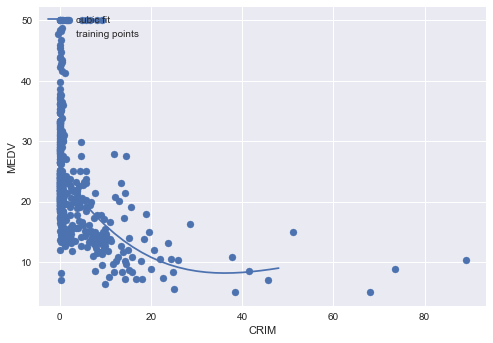

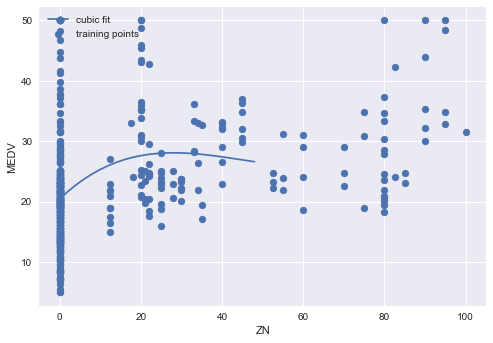

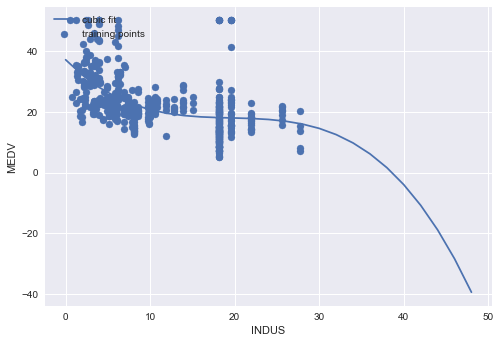

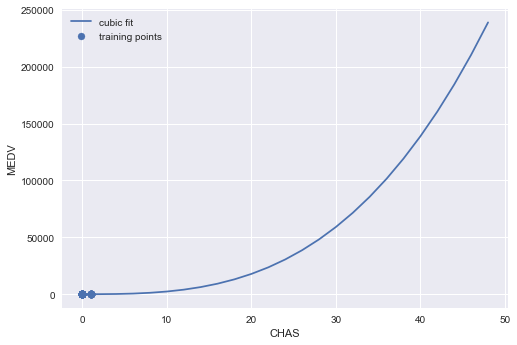

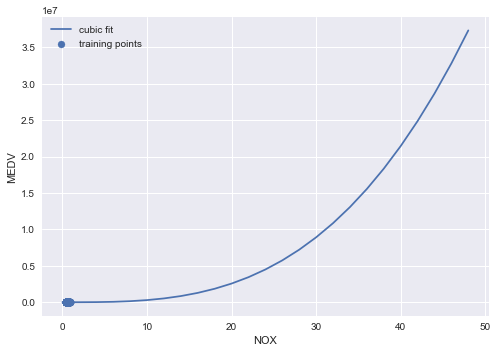

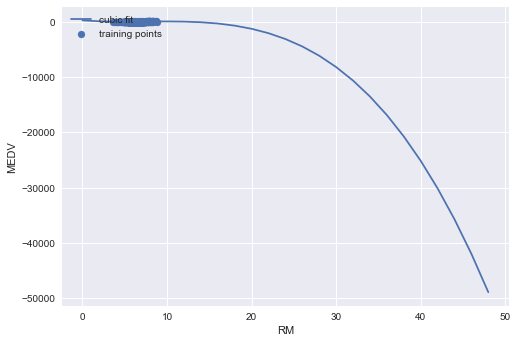

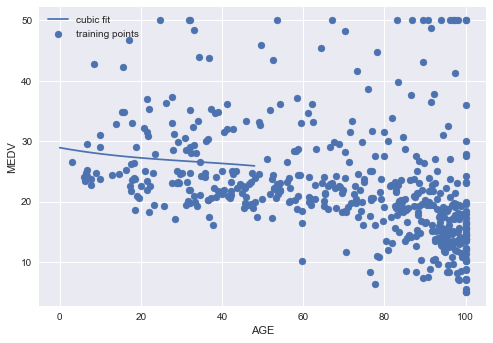

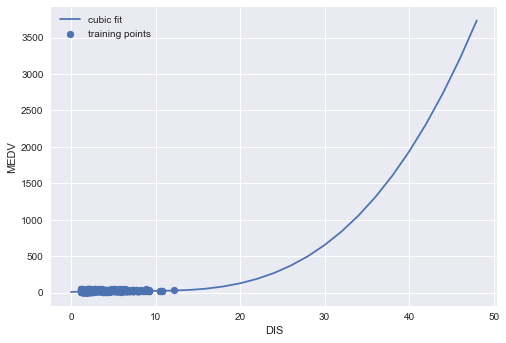

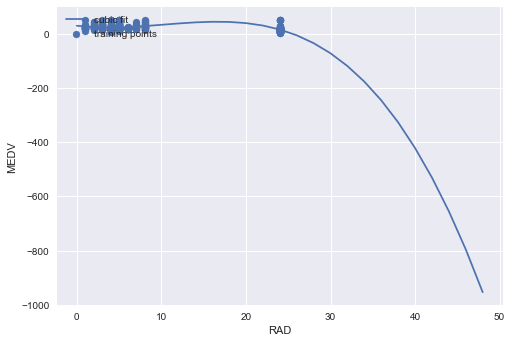

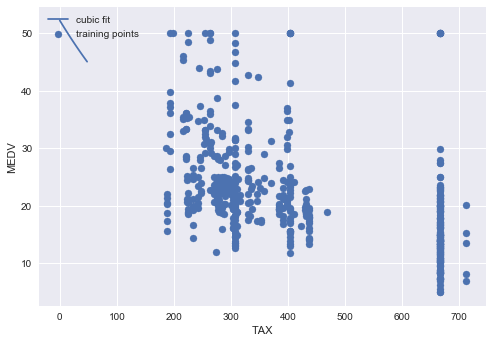

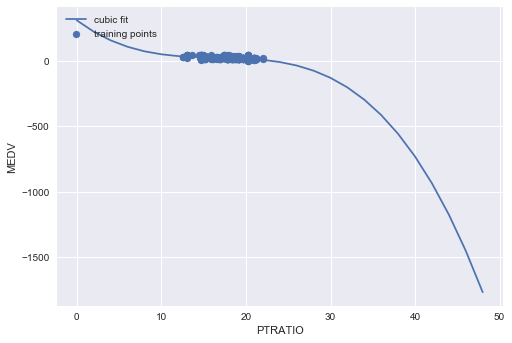

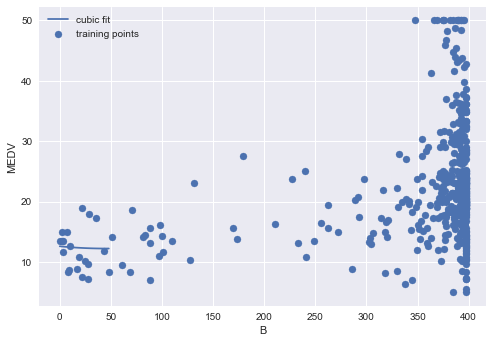

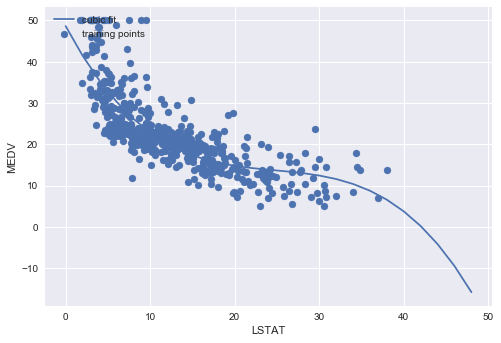

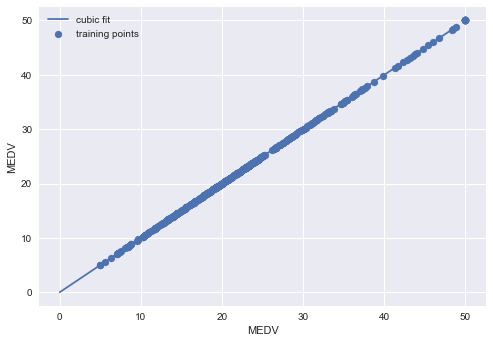

In [32]:
score = []
for i in range(len(cols)):
    plt.figure()
    x = df[cols[i]].values.reshape(-1,1)
    y = df['MEDV'].values.reshape(-1,1)
    lr = LinearRegression()
    pr = LinearRegression()
    cr = LinearRegression()
    quadratic = PolynomialFeatures(degree=2)
    cubic = PolynomialFeatures(degree=3)
    X_quad = quadratic.fit_transform(x)
    X_cubic = cubic.fit_transform(x)
    lr.fit(x, y)
    X_fit = np.arange(0, 50, 2)[:, np.newaxis]
    y_lin_fit = lr.predict(X_fit)
    pr.fit(X_quad, y)
    y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))
    cr.fit(X_cubic, y)
    y_cubic_fit = cr.predict(cubic.fit_transform(X_fit))
    score.append(cr.score(cubic.fit_transform(x),y))
    plt.scatter(x, y, label='training points')
    plt.plot(X_fit, y_cubic_fit, label='cubic fit')
    plt.legend(loc='upper left')
    plt.xlabel(cols[i])
    plt.ylabel('MEDV')
sorted_score = sorted(score)[-4:]
top3 = int(np.where(score == sorted_score[0])[0])
top2 = int(np.where(score == sorted_score[1])[0])
top1 = int(np.where(score == sorted_score[2])[0])
print('Top3: ',cols[top3],', score: ',score[top3])
print('Top2: ',cols[top2],', score: ',score[top2])
print('Top1: ',cols[top1],', score: ',score[top1])
plt.show()

dataset에 대한 cubic polynomial regression을 진행하였을때는 correlation 결과와 quadratic polynomial regression 결과와는 조금 다르게 CRIM, RM, LSTAT순으로 유사 결과가 나왔다.

In [33]:
x1 = df[cols[top3]].values.reshape(-1,1)
x2 = df[cols[top2]].values.reshape(-1,1)
x3 = df[cols[top1]].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)
x = np.hstack((np.ones(np.shape(x1)),x1,x2,x3))
w = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
print(cols[-1], ' = ',w[0],'+',w[1],'*',cols[top3],' + ',w[2],'*',cols[top2],' + ',w[3],'*',cols[top1])

MEDV  =  [-0.96865249] + [-0.06363554] * INDUS  +  [ 5.07379366] * RM  +  [-0.60671351] * LSTAT


위에서 추출한 세개의 유사 특징들을 가지고 pseudo-inverse matrix를 이용하여 multiple linear regression을 진행하면 다음과 같은 식이 도출된다.

Top3:  CRIM , score:  0.853863504523
Top2:  RM , score:  0.88683792644
Top1:  LSTAT , score:  0.910535306282


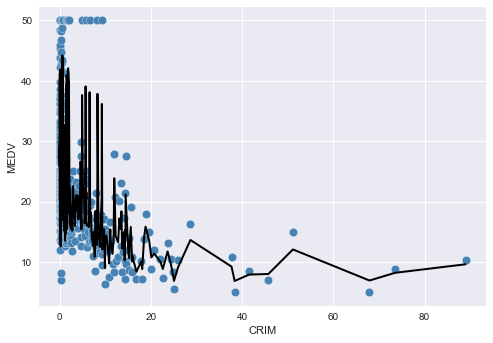

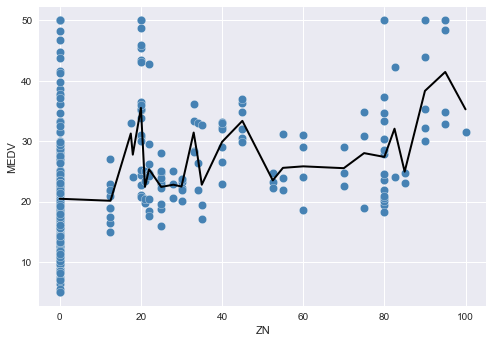

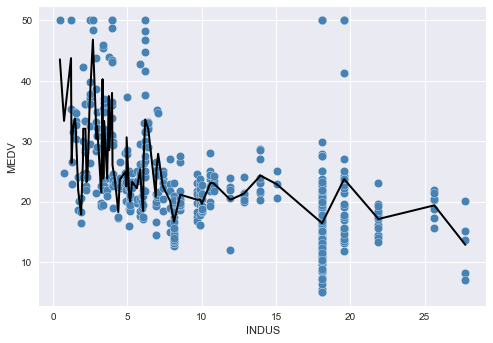

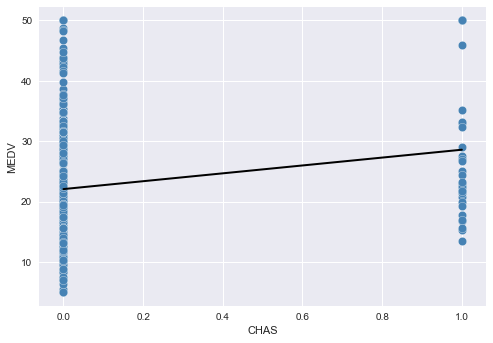

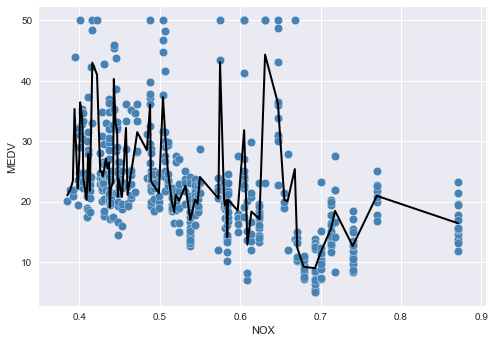

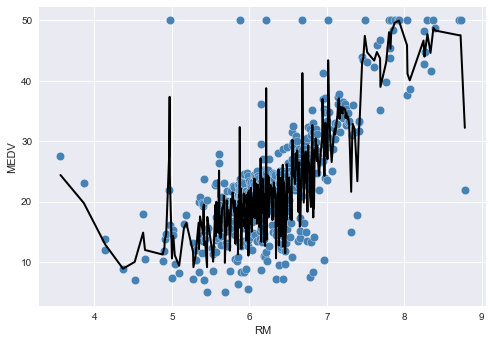

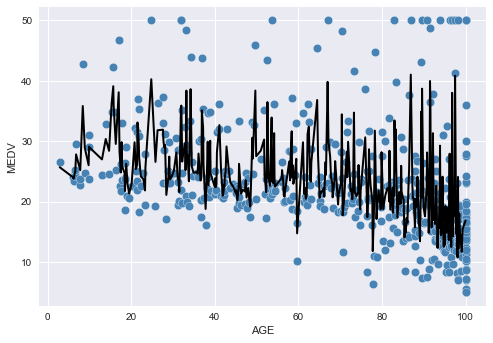

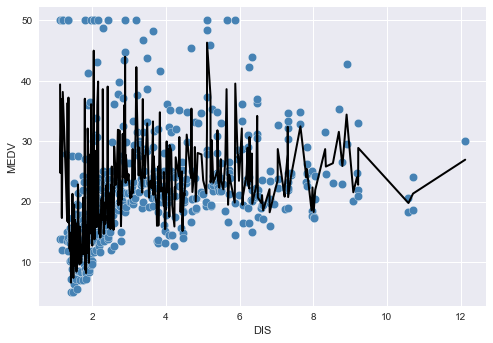

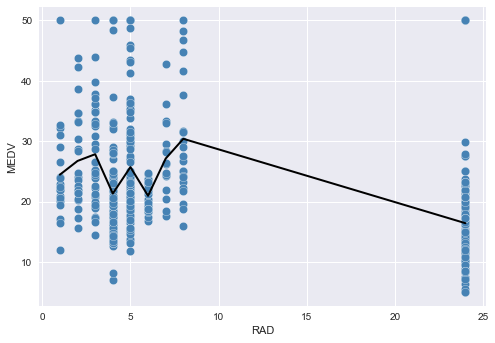

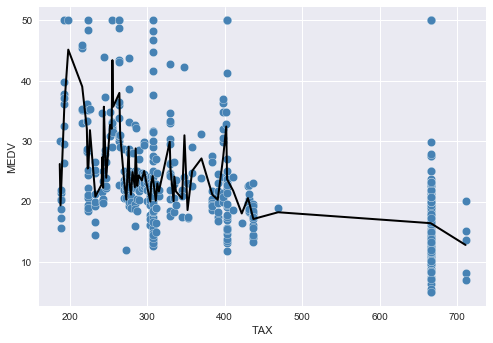

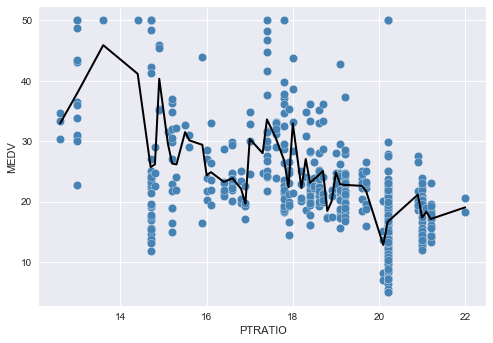

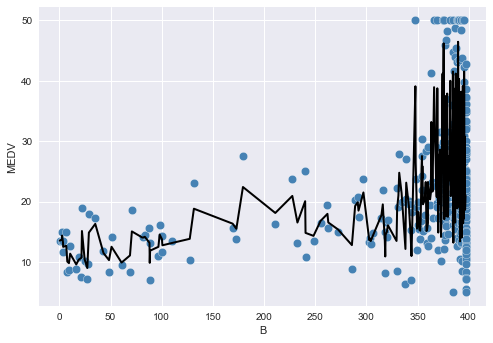

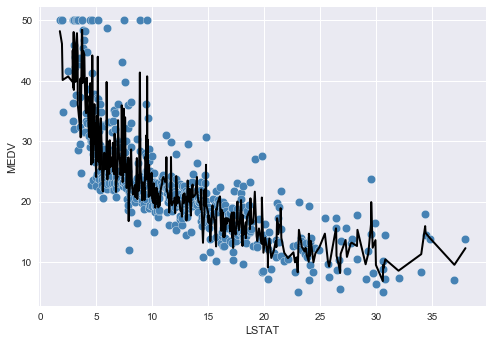

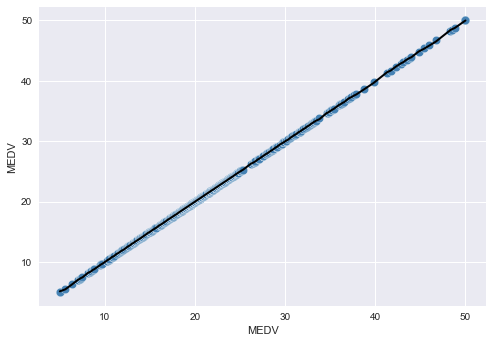

In [38]:
score = []
for i in range(len(cols)):
    plt.figure()
    x = df[cols[i]].values.reshape(-1,1)
    y = df['MEDV'].values.reshape(-1,1)
    forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
    forest.fit(x, np.ravel(y))
    # ordering for plot
    order = np.argsort(x, 0).T[0]
    score.append(forest.score(x,np.ravel(y)))
    lin_regplot(x[order], np.ravel(y)[order], forest)
    plt.xlabel(cols[i])
    plt.ylabel('MEDV')
sorted_score = sorted(score)[-4:]
top3 = int(np.where(score == sorted_score[0])[0])
top2 = int(np.where(score == sorted_score[1])[0])
top1 = int(np.where(score == sorted_score[2])[0])
print('Top3: ',cols[top3],', score: ',score[top3])
print('Top2: ',cols[top2],', score: ',score[top2])
print('Top1: ',cols[top1],', score: ',score[top1])
plt.show()

dataset에 대한 random forest regression을 진행하였을때는 위의 결과들과 다르게 두번째 유사 순위가 바뀌어 RM, CRIM, LSTAT순으로 유사 결과가 나왔다.

In [39]:
x1 = df[cols[top3]].values.reshape(-1,1)
x2 = df[cols[top2]].values.reshape(-1,1)
x3 = df[cols[top1]].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)
x = np.hstack((np.ones(np.shape(x1)),x1,x2,x3))
w = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
print(cols[-1], ' = ',w[0],'+',w[1],'*',cols[top3],' + ',w[2],'*',cols[top2],' + ',w[3],'*',cols[top1])

MEDV  =  [-2.56225101] + [-0.10294089] * CRIM  +  [ 5.21695492] * RM  +  [-0.57848582] * LSTAT


위에서 추출한 세개의 유사 특징들을 가지고 pseudo-inverse matrix를 이용하여 multiple linear regression을 진행하면 다음과 같은 식이 도출된다.